# keras 사용법

## Tokenizer 사용법

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=5) # num_words: 빈도수가 높은 5개 단어만 이용
tokenizer.fit_on_texts(samples)

In [9]:
# 단어 인덱스는 빈도순으로 정렬되어 있습니다.
tokenizer.word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [10]:
# 단어 인덱스가 1에서 num_words까지인 단어만 이용합니다.
sequences = tokenizer.texts_to_sequences(samples)
sequences

[[1, 2, 3, 4, 1], [1]]

In [11]:
# 정수 시퀀스를 단어로 바꾸기
tokenizer.sequences_to_texts(sequences)

['the cat sat on the', 'the']

In [12]:
# 문서 개수
tokenizer.document_count

2

## 패딩 처리

텍스트 데이터는 길이가 제각각입니다. 어떤 문서는 길이가 길고, 어떤 건 짧습니다. 하지만 여러 개의 시퀀스 데이터를 한 번에 처리하기 위해서는 길이를 맞춰줄 필요가 있습니다. 이때 길이가 너무 긴 건 조금 자르고, 길이가 짧은 건 조금 늘려주는 작업을 하게 됩니다.

길이가 짧은 문서를 늘리는 방법은 시퀀스의 앞이나 뒤에 인덱스가 0인 단어로 패딩하는 것입니다.

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 5
pad_sequences(sequences, maxlen=maxlen)

array([[1, 2, 3, 4, 1],
       [0, 0, 0, 0, 1]])

# IMDB 실습

IMDB는 영화 리뷰 데이터 셋으로, 긍/부정 태그가 달려 있습니다. 

- https://ai.stanford.edu/~amaas/data/sentiment/ 

In [14]:
import pandas as pd

trainset = pd.read_csv("./data/Imdb_train.csv")
testset = pd.read_csv("./data/Imdb_test.csv")
trainset.head()

,review,sentiment
0,There are so many reasons as to why I rate the...,pos
1,"Kenneth Branagh's ""Hamlet"" hits all the marks....",pos
2,My watch came a little too late but am glad i ...,pos
3,A brilliant Russian émigré devises the Stanis...,pos
4,As a another reviewer states Hanna's War is an...,pos


In [15]:
X_train_text = trainset.review
X_test_text = testset.review
y_train = trainset.sentiment.apply(lambda x: 1 if x=='pos' else 0)
y_test = testset.sentiment.apply(lambda x: 1 if x=='pos' else 0)

In [16]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
maxlen = 50

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_text)

sequences = tokenizer.texts_to_sequences(X_train_text)
test_sequences = tokenizer.texts_to_sequences(X_test_text)

X_train = pad_sequences(sequences, maxlen)
X_test = pad_sequences(test_sequences, maxlen)

## 모델 만들고 훈련하기

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_words, 1, input_length=maxlen))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 1)             10000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,051
Trainable params: 10,051
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, epochs=15, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/15
98/98 [==============================] - 0s 3ms/step - loss: 0.6929 - acc: 0.5124 - val_loss: 0.6921 - val_acc: 0.5268
Epoch 2/15
98/98 [==============================] - 0s 2ms/step - loss: 0.6870 - acc: 0.5976 - val_loss: 0.6838 - val_acc: 0.6156
Epoch 3/15
98/98 [==============================] - 0s 2ms/step - loss: 0.6693 - acc: 0.6876 - val_loss: 0.6606 - val_acc: 0.6928
Epoch 4/15
98/98 [==============================] - 0s 2ms/step - loss: 0.6363 - acc: 0.7338 - val_loss: 0.6249 - val_acc: 0.7280
Epoch 5/15
98/98 [==============================] - 0s 2ms/step - loss: 0.5943 - acc: 0.7588 - val_loss: 0.5845 - val_acc: 0.7484
Epoch 6/15
98/98 [==============================] - 0s 2ms/step - loss: 0.5504 - acc: 0.7767 - val_loss: 0.5454 - val_acc: 0.7670
Epoch 7/15
98/98 [==============================] - 0s 2ms/step - loss: 0.5096 - acc: 0.7946 - val_loss: 0.5108 - val_acc: 0.7802
Epoch 8/15
98/98 [==============================] - 0s 2ms/step - loss: 0.4737 - acc: 0.80

## 모델 들여다보기

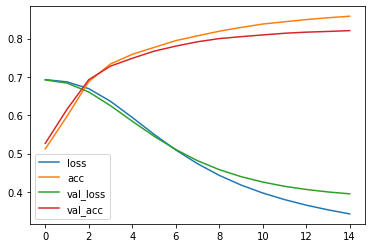

In [20]:
# history.history에는 에폭마다의 손실과 평가 값들이 저장돼있다.
import pandas as pd
pd.DataFrame(history.history).plot()

In [21]:
# get_weights 메서드를 사용하면, 각 레이어의 가중치를 볼 수 있습니다.
wordvecs = model.get_weights()[0]
wordvecs

array([[-0.01221521],
       [-0.02861221],
       [-0.11397249],
       ...,
       [-0.04565937],
       [-0.18075404],
       [ 0.17518178]], dtype=float32)

In [22]:
show_n = 10

id_to_word = {v: k for k, v in tokenizer.word_index.items()}

print("Words with low weights\n----")
for idx in wordvecs.ravel().argsort()[:show_n]:
    print(id_to_word[idx].ljust(10), wordvecs.ravel()[idx])
    
print("\nWords with high weights\n----")
for idx in (-wordvecs).ravel().argsort()[:show_n]:
    print(id_to_word[idx].ljust(10), wordvecs.ravel()[idx])

Words with low weights
----
7          -1.045001
8          -0.8934665
highly     -0.8513297
9          -0.8473843
excellent  -0.8002703
perfect    -0.79555047
wonderful  -0.7156742
great      -0.7062108
recommended -0.67923546
emotions   -0.67215526

Words with high weights
----
waste      1.2015823
worst      1.037407
avoid      0.96080834
awful      0.8927593
terrible   0.8523251
4          0.83854055
bad        0.83042157
mess       0.82641095
3          0.81182986
skip       0.8111698


In [27]:
def is_horrible(text):
    sequence = tokenizer.texts_to_sequences([text])
    X = pad_sequences(sequence, maxlen)
    p = model.predict(X)[0][0]
    if p < 0.5:
        print("Yes!\n", "confidence:", 1-p)
    else:
        print("No!\n", "confidence:", p)

text = "horribly horrible"
is_horrible(text)

Yes!
 confidence: 0.7000953853130341


# Conv1D

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_words, 1, input_length=maxlen))
model.add(keras.layers.Conv1D(32, 2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling1D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
98/98 [==============================] - 0s 5ms/step - loss: 0.6901 - acc: 0.5505 - val_loss: 0.6763 - val_acc: 0.6602
Epoch 2/10
98/98 [==============================] - 0s 4ms/step - loss: 0.6248 - acc: 0.7330 - val_loss: 0.5660 - val_acc: 0.7572
Epoch 3/10
98/98 [==============================] - 0s 4ms/step - loss: 0.4980 - acc: 0.7904 - val_loss: 0.4647 - val_acc: 0.7933
Epoch 4/10
98/98 [==============================] - 0s 4ms/step - loss: 0.4106 - acc: 0.8237 - val_loss: 0.4164 - val_acc: 0.8107
Epoch 5/10
98/98 [==============================] - 0s 4ms/step - loss: 0.3660 - acc: 0.8413 - val_loss: 0.3981 - val_acc: 0.8192
Epoch 6/10
98/98 [==============================] - 0s 4ms/step - loss: 0.3382 - acc: 0.8547 - val_loss: 0.3908 - val_acc: 0.8236
Epoch 7/10
98/98 [==============================] - 0s 4ms/step - loss: 0.3179 - acc: 0.8633 - val_loss: 0.3919 - val_acc: 0.8232
Epoch 8/10
98/98 [==============================] - 0s 4ms/step - loss: 0.3029 - acc: 0.87

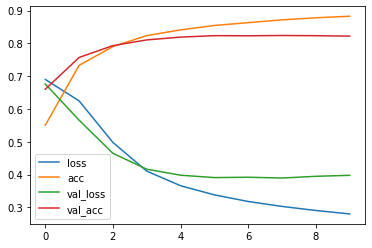

In [36]:
pd.DataFrame(history.history).plot()